# Projet de DataScience 

### Importer les bibliotheques et charger les données

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn.feature_selection import SelectFromModel

### Chargement des données

In [73]:
train_data = pd.read_csv(r"C:\Users\diack\OneDrive\Documents\Projet_data_Aida_Basilia\dataset_loan_eligibility\loan-train.csv")
test_data = pd.read_csv(r"C:\Users\diack\OneDrive\Documents\Projet_data_Aida_Basilia\dataset_loan_eligibility\loan-test.csv")

# Afficher les 5 premières lignes du jeu d'entraînement
print("Aperçu du jeu d'entraînement :")
display(train_data.head())

# Afficher les dimensions
print(f"Train : {train_data.shape[0]} lignes, {train_data.shape[1]} colonnes")
print(f"Test  : {test_data.shape[0]} lignes, {test_data.shape[1]} colonnes")

# Afficher les types de variables et les valeurs manquantes
print("\nInfos sur le jeu d'entraînement :")
train_data.info()
print("\nValeurs manquantes (train) :")
print(train_data.isnull().sum())

Aperçu du jeu d'entraînement :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Train : 614 lignes, 13 colonnes
Test  : 367 lignes, 12 colonnes

Infos sur le jeu d'entraînement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Valeurs manq

### Dustribution de la variable cible 

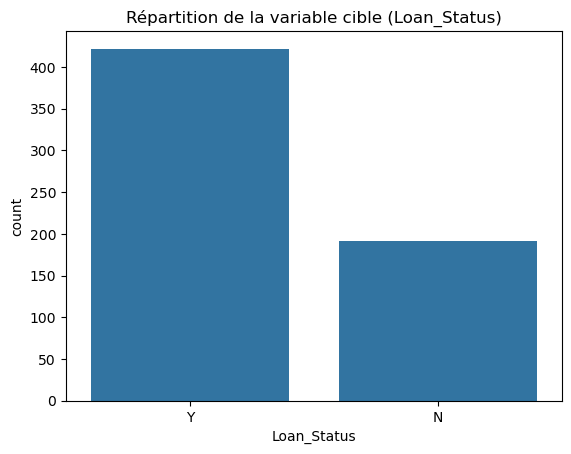

In [74]:
#Distribution de la variable cible Loan_status
sns.countplot(x='Loan_Status', data=train_data)
plt.title("Répartition de la variable cible (Loan_Status)")
plt.show()



In [75]:
df = pd.read_csv(r"C:\Users\diack\OneDrive\Documents\Projet_data_Aida_Basilia\dataset_loan_eligibility\loan-train.csv")
df['Dependents'] = df['Dependents'].replace('3+', '3')
print(df)

df = pd.read_csv(r"C:\Users\diack\OneDrive\Documents\Projet_data_Aida_Basilia\dataset_loan_eligibility\loan-test.csv")
df['Dependents'] = df['Dependents'].replace('3+', '3')
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

### Analyse de la pertinance des variables 

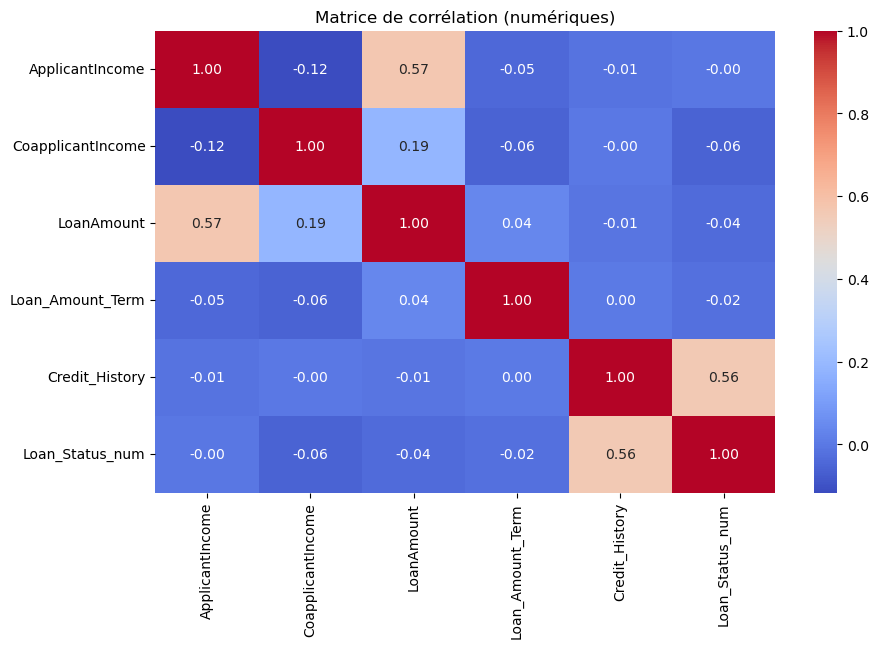

Corrélation avec la cible :
 Credit_History       0.561678
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.021268
LoanAmount          -0.037318
CoapplicantIncome   -0.059187
Name: Loan_Status_num, dtype: float64


In [76]:
#Correlations pour les variables numériques 
df_corr = train_data.copy()
df_corr['Loan_Status_num'] = train_data['Loan_Status'].map({'Y':1, 'N':0})

corr = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (numériques)")
plt.show()

corr_with_target = corr['Loan_Status_num'].drop('Loan_Status_num').sort_values(ascending=False)
print("Corrélation avec la cible :\n", corr_with_target)


La variable Credit_History est la plus corrélée à la cible Loan_Status_num (corrélation ≈ 0.56), ce qui indique que l’historique de crédit est un facteur important pour l’acceptation du prêt.

Les variables ApplicantIncome et LoanAmount sont modérément corrélées entre elles, ce qui est logique car un revenu plus élevé permet souvent de demander un prêt plus important.

Les autres variables numériques ont des corrélations faibles ou proches de zéro avec la cible, ce qui signifie qu’elles n’ont pas de lien linéaire fort avec la décision d’octroi du prêt.

NB: une faible corrélation ne signifie pas qu’une variable est inutile, elle peut avoir un effet non linéaire ou en interaction avec d’autres variables.


In [77]:
#test chi2 pour les variables categorielles 
from scipy.stats import chi2_contingency

cat_vars = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents', 'Property_Area']

print("Test du chi2 entre chaque variable catégorielle et la cible :")
for var in cat_vars:
    table = pd.crosstab(train_data[var], train_data['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{var:15} - p-value du Khi2 : {p:.4f}")


Test du chi2 entre chaque variable catégorielle et la cible :
Gender          - p-value du Khi2 : 0.7087
Married         - p-value du Khi2 : 0.0344
Education       - p-value du Khi2 : 0.0431
Self_Employed   - p-value du Khi2 : 1.0000
Dependents      - p-value du Khi2 : 0.3679
Property_Area   - p-value du Khi2 : 0.0021


Dans le principe du chi2 il y'a une dependance signifificative entre les variables et la cible si le p-value<0.05

In [78]:
# Colonnes à exclure (identifiant)
drop_cols = ['Loan_ID']

# Variables numériques
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Variables catégorielles binaires
bin_cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed']

# Variables catégorielles multi-classes
multi_cat_cols = ['Dependents', 'Property_Area']



### Préparation des pipelines de prétraitement

In [79]:
# Pipeline pour les variables numériques : imputation par la médiane + standardisation
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Remplace les valeurs manquantes par la médiane de la colonne
    ('scaler', StandardScaler())#standardise les variables 
])

# Pipeline pour les variables catégorielles multi-classes : imputation + one-hot encoding
multi_cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Imputation pour variables catégorielles binaires (on fera l'encodage label à part)
bin_cat_imputer = SimpleImputer(strategy='most_frequent')
# afficher l'encodage 


In [80]:
# Suppression de la colonne Loan_ID
# Le dataset était déja separé avec 37% de test et le reste d'entrainement
train = train_data.drop(columns=drop_cols)
test = test_data.drop(columns=drop_cols)
#afficher si l'id est supprimé
display(train.head())
display(test.head())

# Imputation des variables catégorielles binaires
for col in bin_cat_cols:
    train[col] = bin_cat_imputer.fit_transform(train[[col]]).ravel()
    test[col] = bin_cat_imputer.transform(test[[col]]).ravel()

# Encodage label des variables binaires
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in bin_cat_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    label_encoders[col] = le

    # Afficher l'encodage des variables binaires
for col, le in label_encoders.items():
    print(f"Encodage de la variable '{col}':")
    for i, classe in enumerate(le.classes_):
        print(f"  {classe} --> {i}")
    print()

# Afficher l'encodage de la variable cible
print("Encodage de la variable cible 'Loan_Status':")
for i, classe in enumerate(target_le.classes_):
    print(f"  {classe} --> {i}")


# Encodage de la variable cible Loan_Status (Y=1, N=0)
target_le = LabelEncoder()
train['Loan_Status'] = target_le.fit_transform(train['Loan_Status'])


# Séparation des features et de la cible
X_train = train.drop(columns=['Loan_Status'])
y_train = train['Loan_Status']
X_test = test.copy()

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, num_cols),
    ('multi_cat', multi_cat_pipeline, multi_cat_cols)
])

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Encodage de la variable 'Gender':
  Female --> 0
  Male --> 1

Encodage de la variable 'Married':
  No --> 0
  Yes --> 1

Encodage de la variable 'Education':
  Graduate --> 0
  Not Graduate --> 1

Encodage de la variable 'Self_Employed':
  No --> 0
  Yes --> 1

Encodage de la variable cible 'Loan_Status':
  N --> 0
  Y --> 1


### Random Forest classifier

In [81]:
# Modèle Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_preprocessed, y_train)
y_pred_rf = rf.predict(X_train_preprocessed)

print("Random Forest (apprentissage, toutes variables) :")
print(classification_report(y_train, y_pred_rf))
print("Validation croisée (accuracy):", cross_val_score(rf, X_train_preprocessed, y_train, cv=5).mean())# Bien expliquer la validation croisée


Random Forest (apprentissage, toutes variables) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

Validation croisée (accuracy): 0.7768892443022791


### Matrice de confusion 